# 911 Calls Capstone Project

**Importing libraries**

In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Reading the Data

In [255]:
df = pd.read_csv("911.csv")

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [257]:
df = df.copy()

In [258]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**Data Cleaning**

The reason for the call is represented by the title column, composed by a category and a subcategory
Therefore, we will begin by splitting this column into two new columns

In [259]:
df['category'] = df['title'].apply(lambda x: x.split(": ")[0])
df['subcategory'] = df['title'].apply(lambda x: x.split(": ")[1])

Now reading the newly added columns.

In [260]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,category,subcategory
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


To explore the calls in the studied period, we will use the timeStamp column
First, we have to convert the timeStamp column from string to datetime

In [261]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

Now we can create three new columns out of 'timestamp' to better explore the data

In [262]:

df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.strftime("%a"))
df['Hour'] = df['timeStamp'].apply(lambda x: x.strftime("%H"))

**Exploratory Data Analysis**

What is the most common Reason for a 911 call based off of this new column?

In [263]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Text(0, 0.5, 'Number of calls')

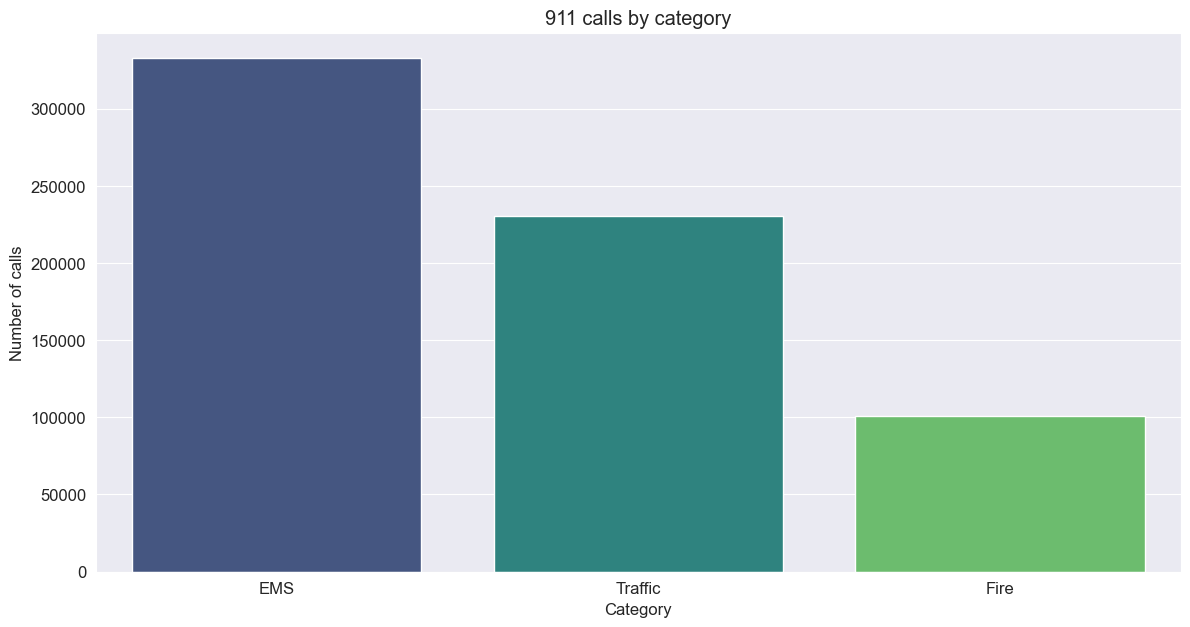

In [264]:
# In order to better visualize, we can plot the above information
plt.figure(figsize=(14,7))

sns.countplot(x="category",data=df,palette="viridis",order=df['category'].value_counts().index)
plt.title("911 calls by category")
plt.xlabel("Category")
plt.ylabel("Number of calls")

Now, for example, let's explore the most representative subcategories in the EMS category

Text(0, 0.5, 'Subcategory')

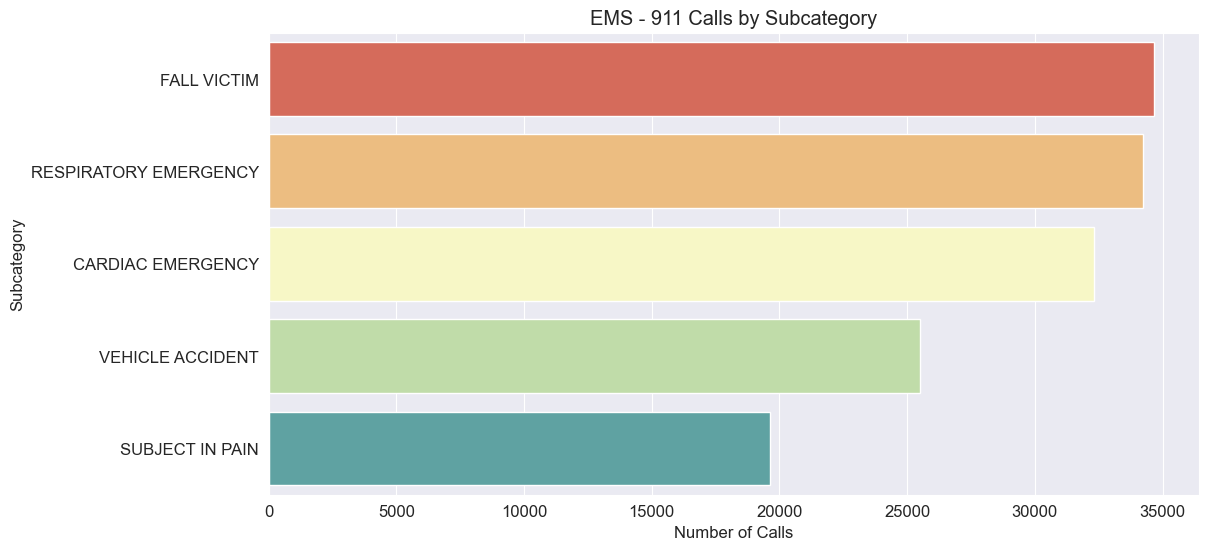

In [271]:
plt.figure(figsize=(12,6))

sns.barplot(x=df[df["category"] == "EMS"]['subcategory'].value_counts().head(),
            y=x.index.to_list(), 
            data=df[df["category"] == "EMS"],palette='Spectral', orient='h')

plt.title('EMS - 911 Calls by Subcategory')
plt.xlabel('Number of Calls')
plt.ylabel('Subcategory')

Call time

Text(0.5, 1.0, '911 Calls - Evolution')

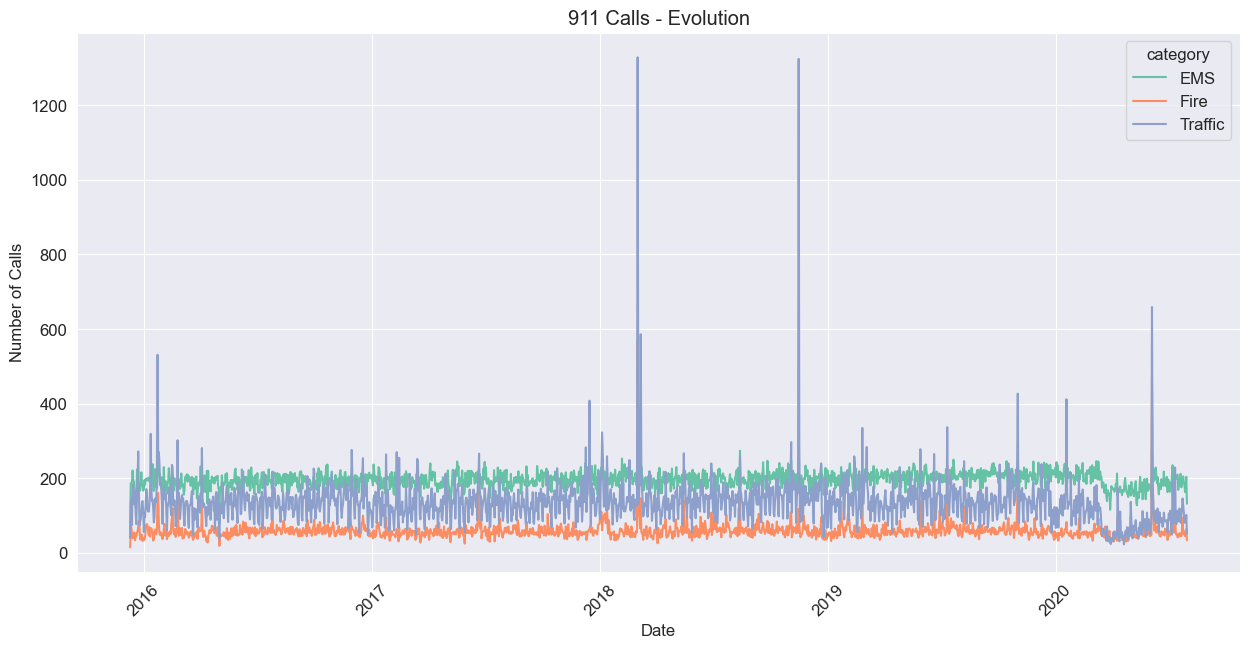

In [266]:
by_date_category = df.groupby(['Date','category']).size().reset_index().rename(columns={0:'Number of Calls'})
by_date_category

plt.figure(figsize=(15,7))

sns.lineplot(x="Date",y="Number of Calls",data=by_date_category,hue="category", palette='Set2')
plt.xticks(rotation=45)
plt.title('911 Calls - Evolution')

Analyzing the plot above, we can clearly see several spikes in traffic related calls.
Let's see now the dates with higher occurrences and the exact number of calls.

In [267]:
df[df['category'] == 'Traffic'].groupby('Date').size().reset_index()\
                     .rename(columns={0:'Number of Calls'})\
                     .sort_values("Number of Calls",ascending = False)\
                     .head(10)


,Date,Number of Calls
813,2018-03-02,1328
1071,2018-11-15,1324
1637,2020-06-03,659
818,2018-03-07,586
44,2016-01-23,531
1422,2019-11-01,427
814,2018-03-03,417
1500,2020-01-18,412
736,2017-12-15,408
1309,2019-07-11,337


**How are the calls distributed in time?**

<AxesSubplot: xlabel='Hour', ylabel='Day of Week'>

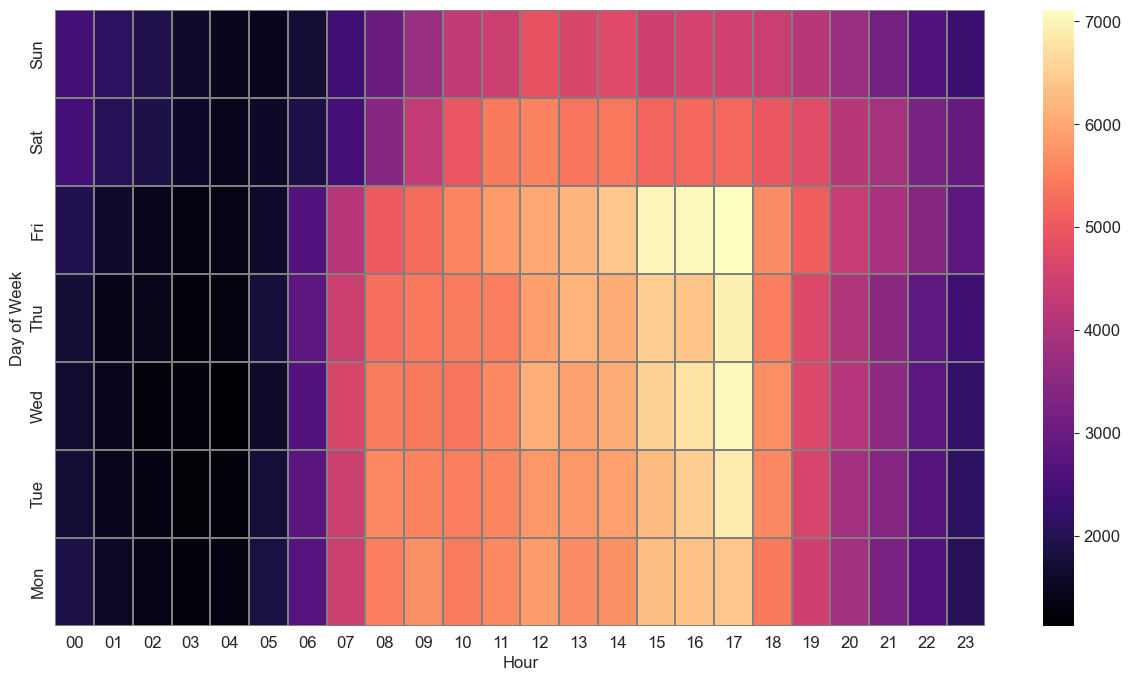

In [268]:
# Data for the plot
byDayHour = df.groupby(['Day of Week','Hour']).size().reset_index().rename(columns={0:'Number of Calls'})

byDayHour_df = pd.pivot_table(data=byDayHour,values='Number of Calls',index='Day of Week',columns="Hour",aggfunc='sum')
byDayHour_df.index = pd.CategoricalIndex(byDayHour_df.index,categories=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"][::-1])
byDayHour_df.sort_index(inplace=True)
plt.figure(figsize=(15,8))
sns.heatmap(byDayHour_df,cmap='magma', linecolor='grey', linewidth=0.2)

**What are the top 5 townships (twp) for 911 calls?**

In [269]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

**How many unique title codes are there?**

In [270]:
    
df['title'].nunique()

148